# AIM: test creating a mosaic from L2 swath files

Following example code here: http://hdfeos.org/zoo/MORE/LAADS/MOD/MOD04_L2_merge.z.py


### 1: import packages required

In [1]:
import os
import glob                                                                 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np

from pyhdf.SD import SD, SDC

### 2: specify datadir and get name of datafield to read from files

In [2]:
datadir='path/to/data/'

# block below for inspecting SDSs contained in files
# FILE_NAME=datadir+'MYDATML2.A2022214.1830.061.2022215180306.hdf'
# hdf = SD(FILE_NAME, SDC.READ)
# hdf.datasets()

DATAFIELD_NAME='Viewing_Zenith_10km'

### 3: list files, loop over files, copy the mosaic code from example

In [3]:
flist=sorted(glob.glob(datadir+'MYDATML2.A2022214.*.hdf'))
nfiles=len(flist)
for f,file in enumerate(flist):
    #print(f,file)
    filename=file.split('/')[-1]

    #open file
    reader=open(file)
    hdf=SD(file,SDC.READ)
    
    #read dataset of interest
    data2d=hdf.select(DATAFIELD_NAME)
    data=data2d[:,:].astype(np.double)
    
    #get latlons and variable attributes
    lat=hdf.select('Latitude_10km')
    latitude=lat[:,:]
    lon=hdf.select('Longitude_10km')
    longitude=lon[:,:]
    
    attrs=data2d.attributes(full=1)
    aoa=attrs['add_offset']
    add_offset=aoa[0]
    fva=attrs['_FillValue']
    _FillValue=fva[0]
    sfa=attrs['scale_factor']
    scale_factor=sfa[0]
    ua=attrs['units']
    units=ua[0]
    
    #mask data
    data[data == _FillValue] = np.nan
    data = (data - add_offset) * scale_factor 
    datam = np.ma.masked_array(data, np.isnan(data))
    
    #build mosaic
    if f==0:
        data_m=datam
        latitude_m=latitude
        longitude_m=longitude
    else: #f > 0
        data_m=np.vstack([data_m, datam])
        latitude_m=np.vstack([latitude_m,latitude])
        longitude_m=np.vstack([longitude_m,longitude])
        
        #end else
    
    #check what is happening here
    print('file',f,'of',nfiles,'processed, _m array shapes=',np.shape(data_m),np.shape(longitude_m),np.shape(latitude_m))
    
    #end for

file 0 of 28 processed, _m array shapes= (203, 135) (203, 135) (203, 135)
file 1 of 28 processed, _m array shapes= (407, 135) (407, 135) (407, 135)
file 2 of 28 processed, _m array shapes= (610, 135) (610, 135) (610, 135)
file 3 of 28 processed, _m array shapes= (813, 135) (813, 135) (813, 135)
file 4 of 28 processed, _m array shapes= (1017, 135) (1017, 135) (1017, 135)
file 5 of 28 processed, _m array shapes= (1220, 135) (1220, 135) (1220, 135)
file 6 of 28 processed, _m array shapes= (1423, 135) (1423, 135) (1423, 135)
file 7 of 28 processed, _m array shapes= (1626, 135) (1626, 135) (1626, 135)
file 8 of 28 processed, _m array shapes= (1829, 135) (1829, 135) (1829, 135)
file 9 of 28 processed, _m array shapes= (2032, 135) (2032, 135) (2032, 135)
file 10 of 28 processed, _m array shapes= (2235, 135) (2235, 135) (2235, 135)
file 11 of 28 processed, _m array shapes= (2438, 135) (2438, 135) (2438, 135)
file 12 of 28 processed, _m array shapes= (2641, 135) (2641, 135) (2641, 135)
file 13 

### 4. plot results

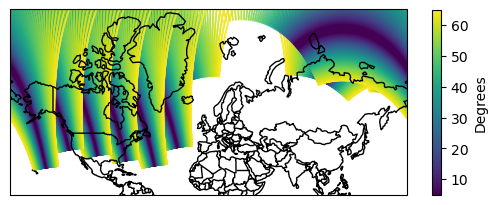

In [4]:
ax = plt.axes(projection = ccrs.Mercator())
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)
p = plt.scatter(longitude_m, latitude_m, c=data_m, 
                s=0.1, cmap=plt.cm.viridis, vmin=5, vmax=65,
                transform=ccrs.PlateCarree())
ax.set_extent([-180,180,0,90])
cb = plt.colorbar(p,shrink=0.5)
cb.set_label(units)

### How to resolve the swath overlap issue?
- (NOTE that the plot does not have swaths for the whole of the globe as only L2 files that covered a certain roi were downloaded)